An Electro Cardio Gram (ECG) is a simple test that can can be used to check you heart rhythm nad electrical activity.

Classes = [N:0, S:1, V:2, F:3, Q:4]

* N: Non Ectopic beats (Normal beats)
* S: Supraventrical ectopic beats
* V: Ventricular ectopic beats
* F: Fusion beats
* Q: Unknown beats

نقوم بأستيراد المكاتب التي سنعمل عليها
numpy:من أجل التعامل مع المصفوفات نتعددة الأبعاد
Pandas: تحوي على توابع مهمة  لمعالجة البيانات وتحليلها
matplotlib:تحوي توابع رسم بيانية مهمة
seaborn:مكتبة تحوي على العديد من التوابع المهمة لعرض الداتا بطرق مختلفة

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

نقوم بالبداية بتحميل الداتا من ملف العينات و هو عبارة عن ملف اكسل يحوي على 187 عينة تدريب ونقوم بذلك عن طريق التابع الذي تقدمه مكتبه بانداس

In [2]:
#reading dataset
train_data = pd.read_csv("mitbih_train.csv", header = None)
test_data = pd.read_csv("mitbih_test.csv", header = None)

سنقوم بطباعة الداتا لرؤية شكلها و طبيعتها

In [34]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


**Exploratory Data Analysis**

معرفة اذا كان يوجد قيم Null

In [5]:
# checking null values
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

 سنقوم بفلترة الداتا لرؤية محتواها من غير تكرار للتصنيفات و نجد بأنه يوجد 5 أنواع

In [39]:
train_data.iloc[:, 187].unique()

array([0, 1, 2, 3, 4])

سنقوم بتحويل العامود الممثل لنوع العينة لانتجر و ذلك لمعرفة تكرار كل صنف من الاصناف الخمسة

In [7]:
# casting into int
train_data[187] = train_data[187].astype('int')

In [8]:
test_data[187] = test_data[187].astype('int') 

لرؤية أوضح للاعداد سنقوم برسم مخطط بياني يدل على عدد العينات من كل صنف في الداتاسيت

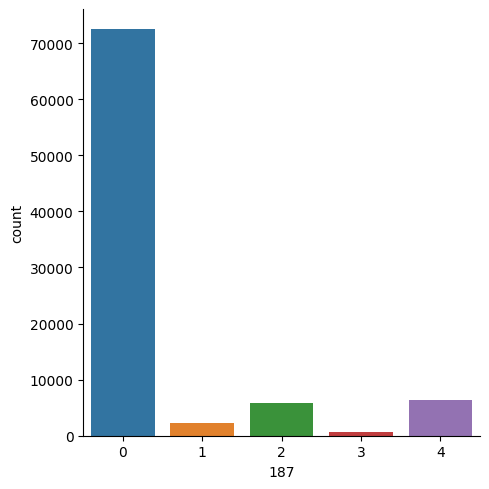

In [10]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_data)

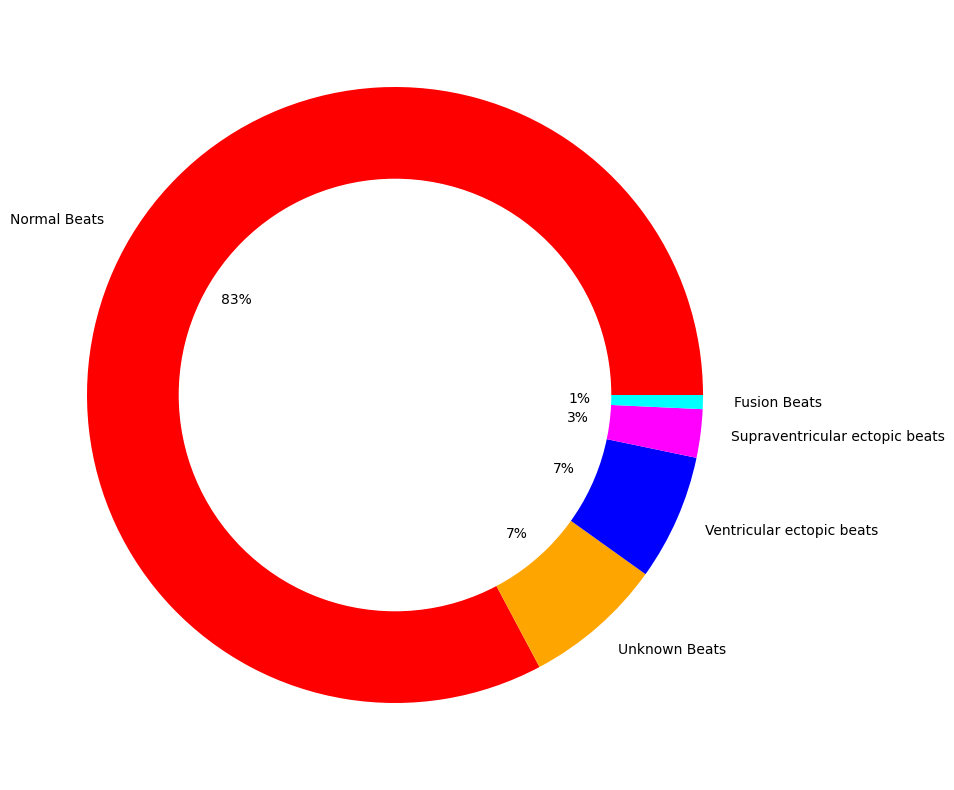

In [14]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_data[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

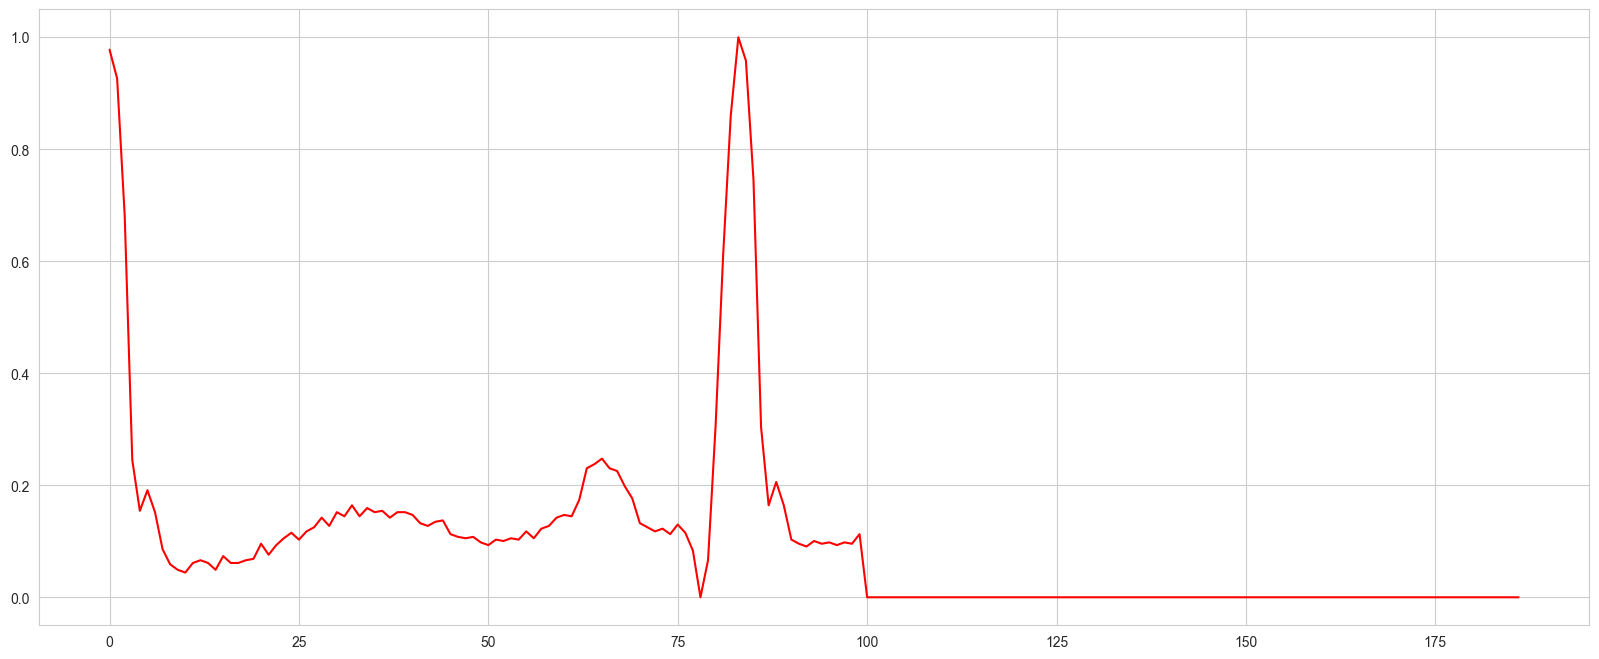

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()

سنقوم بتقسيم الداتاحسب الأنواع الموجودة لدينا

In [49]:
# Splitting data into Each Classes
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

In [50]:
df_1

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783,1
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000,1
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74689,1.000000,0.917073,0.253659,0.000000,0.092683,0.185366,0.165854,0.239024,0.278049,0.185366,...,0.375610,0.380488,0.356098,0.346341,0.370732,0.40000,0.375610,0.380488,0.400000,1
74690,0.014837,0.130564,0.213650,0.311573,0.430267,0.548961,0.664688,0.700297,0.721068,0.718101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
74691,1.000000,0.895735,0.199052,0.000000,0.052133,0.052133,0.042654,0.104265,0.203791,0.194313,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
74692,0.904059,0.808118,0.195572,0.000000,0.081181,0.114391,0.147601,0.225092,0.177122,0.136531,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1


يمكننا رؤية الخط البياني الممثل لصنف معين مقارنة مع مجموعة التدريب الكلية 

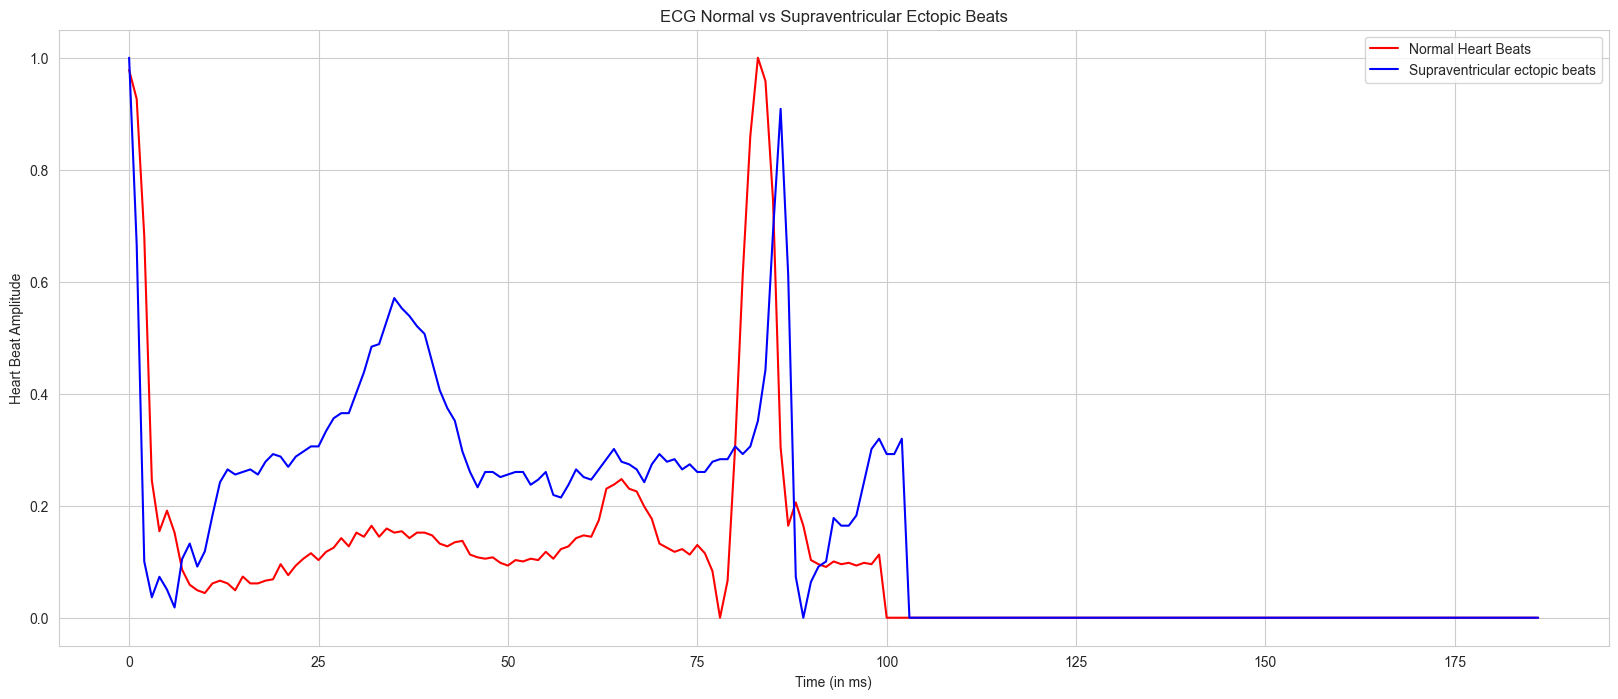

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

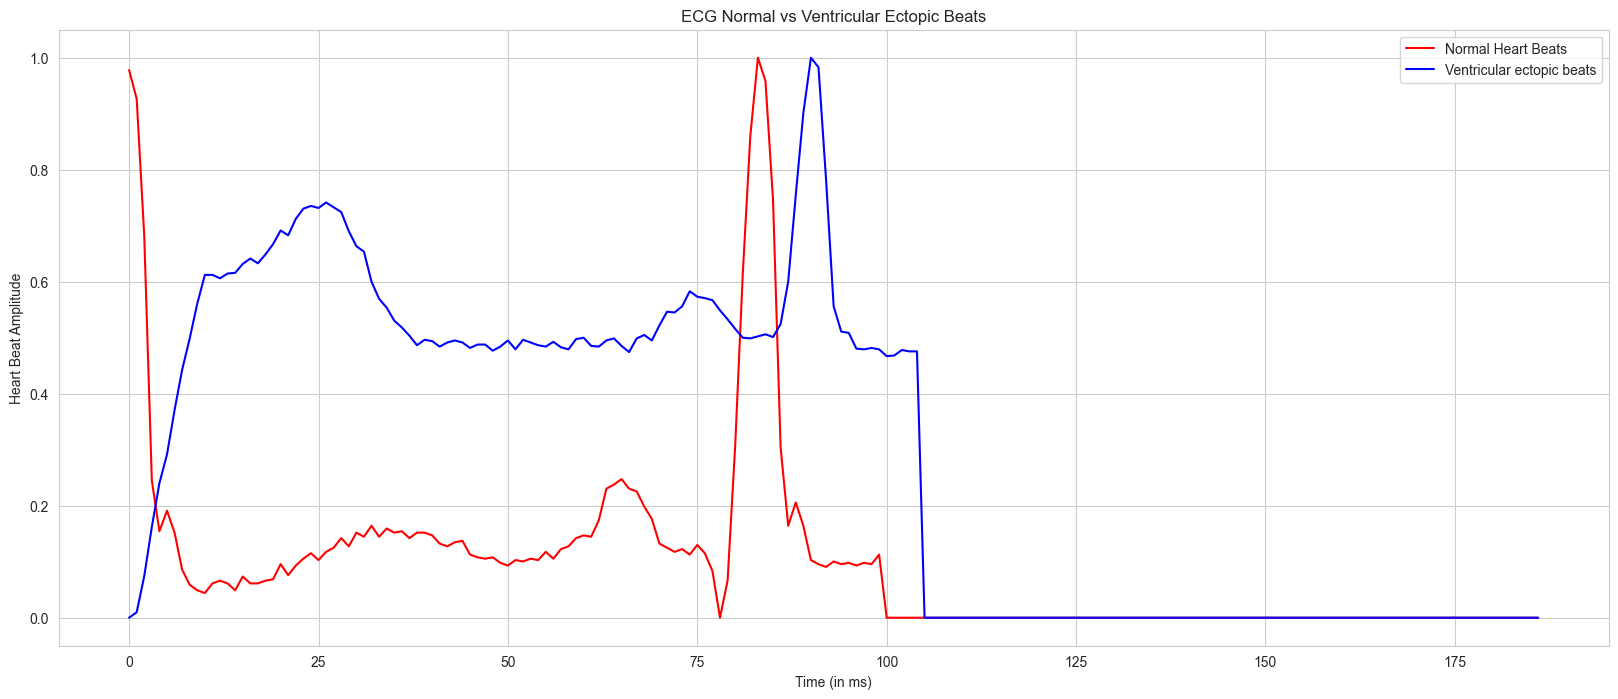

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Ventricular ectopic beats')
plt.title("ECG Normal vs Ventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

**Data Augmentation**
* Since data is biased we will upsample it

سنقوم بأخذ عدد معين من العينات للتجريب عليها
و قد تم تقسيم الداتا بهذا الشكل لجعل المودل يتدرب على كافة الاصناف بالتساوي 

In [60]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)

In [61]:
# downsample the high number of counts in one class, select random samples 2000 samples from class 0 samples
df_0 = train_data[train_data[187]==0].sample(n =20000, random_state=123)

و بعد اختيار 2000 عينة من كلة صنف سنقوم بجمعها بداتاسيت جديدة و دمجهمه سوياً

In [63]:
# merge and all dataframes to create new train samples
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

لنقم بتمثيلهم ببيان لنرى تقسيم الداتا بشكل أوضح

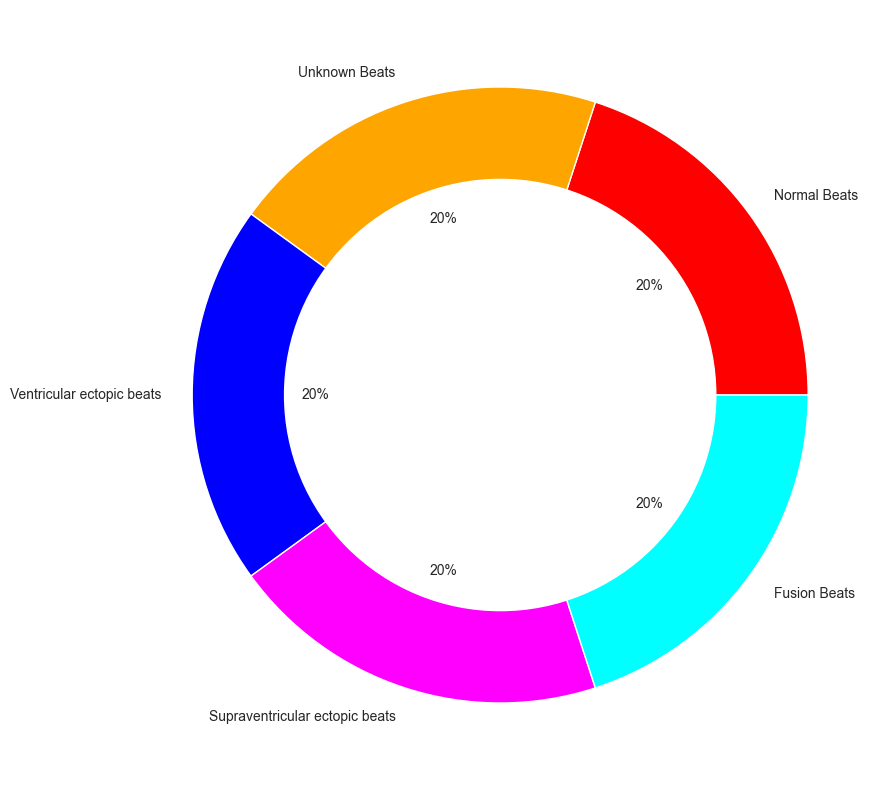

In [65]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

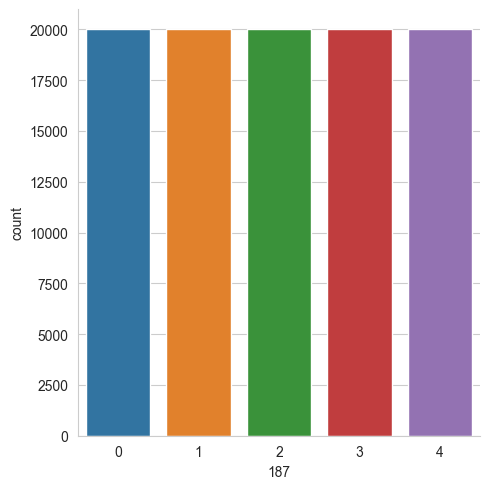

In [66]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_df)

سنقوم بأنشاء مصفوفة تعبر عن الهدف المتوقع من كل عينة بعد التصنيف

In [71]:
# target Y
target_train = train_df[187]
target_test = test_data[187]

In [72]:
target_train.unique()

array([0, 1, 2, 3, 4])

This is not good for classification, we always convert them into catagorical one hot encoding

In [73]:
# convert integer values into categorical one hot encoding
# Class 1 - [0,1,0,0,0]
# Class 4 - [0,0,0,0,1]

to_categorical
تابع يقوم بتقسيم مصفوفة لعدة تصنيفات حسب الداتا المرسلة له كبرامتر و في حالتنا سيتم انشاء مصفوفة تحوي خمسة اصناف 

In [75]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

In [76]:
y_test = to_categorical(target_test)

In [78]:
X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values

This will work good with ANN Classification

In [79]:
# this data is in single dimension, 1D (no of samples, features)
X_train.shape

(100000, 187)

سنعيد تشكيل الداتاسيت خاصتنا و جعلها مناسبة للشبكة التي سنعمل عليها

In [83]:
# For conv1D dimentionality should be 187X1 where 187 is number of features and 1 = 1D Dimentionality of data
X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
X_test = X_test.reshape(len(X_test),X_test.shape[1],1)

In [84]:
X_train.shape

(100000, 187, 1)

**CNN - Conv1D**

لنقم ببناء الشبكة 
بالبداية سنقوم باستيراد المكاتب التي سنعمل عليها 
Sequential:و هي لانشاء شبكة من عدة طبقات
Dense: لانشاء شبكة تحوي طبقات ذات عصبونات كاملة الاتصال مع كامل عصبونات الطبقة التالية
Conv1D:و هو كلاس يقدم لنا عملية الطي
MaxPooling1D:لاجل عملية التحديد
Flatten: لتجهيز الصفات و جعلها قابلة للدخول للشبكة الصعبونية 

In [85]:
from keras.models import Sequential
from keras.layers import Dense # for fully connected layers dense will be used
from keras.layers import Conv1D, MaxPooling1D, Flatten

# avoid overfitting by normalizing the samples
from tensorflow.keras.layers import BatchNormalization


In [88]:
def build_model():
    model = Sequential()
    
    # Filters = Units in Dense Total number of Neurons
    # Padding = 'same' , zero-padding, Add zero pixels all around input data
    """
    قمنا بأنشاء تابع يعبر عن الطبقة الاولى من الدخل و قمنا بتحديد البرامتراتر اعتماداً على طبيعة الداتا و العينات التي نعمل عليها
    سنستخدم تابع ريلو و ذلك لأننا نعمل على مسألة تصنيف و هو من أفضل اليارات لذلك
    """
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (187, 1))) #we pass individual values hence not 100000,187,1
    
    # Normalization to avoid overfitting
    #التابع التالي يستخدم لعمل نورمالايز على الدخل و ذلك لتقليل الضجيج و تجنب الاوفرفيتينغ و التعلم بشكل فعال
    model.add(BatchNormalization())
    """
    للقيام بعملية البولينغ سنستخدم التابع المخصص و في برامتراته سنحدد حجم النافذة التي ستتبطق على 
    مصفوفة الدخل, و حجم الخطوة التي ستتخذها النافذة عندما تتحرك و نوع البادينغ عندما تنتهي النافذة 
    في شبكتنا يكون حجم الصورة بعد الانتهاء هو نفس الحجم فسيكون تابع البولينغ بالشكل
    """
    # Pooling 
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    """
    سنقوم بثلاث عمليات طي و تحديد بتكرار التعليمات و اضافتها للمودل 
    """
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    # Flatten 
    """
    سنقوم بتحويل الدخل لمصفوفة ذات بعد واحد و ذلك لتجهزيها للمرور على الشبكة العصبية, باستخدام تابع فلاتن
    الذي سقوم بتحويل مصفوفة الدخل المعطة للمودل لمصفوفة احادية
    """
    model.add(Flatten())

    # Fully connected layer
    # input layer
    """
    سنبدأ ببناء الشبكة و و ستكون مكونة من ثلاث طبقات في كل طبقة تحوي 64 عصبون و تابع ريلو
    """
    model.add(Dense(units = 64, activation='relu'))
    
    # Hidden Layer
    model.add(Dense(units = 64, activation='relu'))
    """
    قمنا باستخدام تابع سوفت ماكس في طبق الخرج و ذلك لانه مناسب حيث انه يقوم بتحويل القيمة لنسبة احتمالات و هذا ما نريد كوننا نعمل
    على مسألة نصنيف متعددة
    """
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))
    """
    في النهاية مرحلة  الكومبايل و سنقوم بوضع البرامترات كالاتي
    optimizer = 'Adam': و ذلك لأنه يعتمد على تغيير عامل التعلم في كل عينة و بالتالي القدرة على التعلم من المعلومات بشكل افضل
    loss = 'categorical_crossentropy': هذا التابع مناسب جداً لمسائل التصنيف  حيث يقوم بالمقارنة بين القيمة الاحتمالية المتوقعة و القيمة الاحتمالية الصحيحة
    metrics = ['accuracy']: حيث انه هذا العامل يحاول رفع دقة المودل بالتوقع

    """
    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [89]:
# نستدعي التابع الذي يقوم ببناء المودل
model = build_model()

In [90]:
# This is for one sample, i.e. one row
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 64)           448       
                                                                 
 batch_normalization (BatchN  (None, 187, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 94, 64)           256       
 hNormalization)                                                 
                                                        

In [91]:
"""
سنقوم الأن بتدريب الشبكة 
بالبداية سسنمرر العينات مع التوقع الخاص بها 
و سنقوم بتحديد 15 جيل للتدريب
سنقوم بتعيين باتش ب 32 ليكون التعليم بشكل دقيق اكثر
سنقوم باعطاء المودل مجموعة الاختبار و ذلك لتقييم المودل بعد كل عصر تدريب  و هذا سيزيد من اداء الشبكة في التدريب
"""
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/15
3125/3125 [==============================] - 192s 60ms/step - loss: 0.1811 - accuracy: 0.9349 - val_loss: 0.1630 - val_accuracy: 0.9473
Epoch 2/15
3125/3125 [==============================] - 186s 59ms/step - loss: 0.0764 - accuracy: 0.9742 - val_loss: 0.1403 - val_accuracy: 0.9581
Epoch 3/15
3125/3125 [==============================] - 192s 62ms/step - loss: 0.0515 - accuracy: 0.9827 - val_loss: 0.1170 - val_accuracy: 0.9663
Epoch 4/15
3125/3125 [==============================] - 172s 55ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.1219 - val_accuracy: 0.9712
Epoch 5/15
3125/3125 [==============================] - 157s 50ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.1011 - val_accuracy: 0.9772
Epoch 6/15
3125/3125 [==============================] - 162s 52ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.1184 - val_accuracy: 0.9725
Epoch 7/15
3125/3125 [==============================] - 173s 55ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0

**Accuracy of the model comes out to be 0.9975!**

In [95]:
# للتأكد من أن المودل سيقوم بالعمل بنسبة جيدة على الداتا الجديدة سنرى نسبة الدقة عند اختباره على داتا التجريب
# evaluate ECG Test Data
model.evaluate(X_test, y_test)

685/685 [==============================] - 9s 13ms/step - loss: 0.1239 - accuracy: 0.9818


[0.1238839253783226, 0.9817741513252258]

لنرى مرحلة رفع الدقة سنقوم برسم خط بياني يعبر عن رفع الدقة و كيف تغيرت الدقة خلال كل حقبة
و سنقوم برسم خط بياني اخر لرؤيةاللوس

<AxesSubplot: >

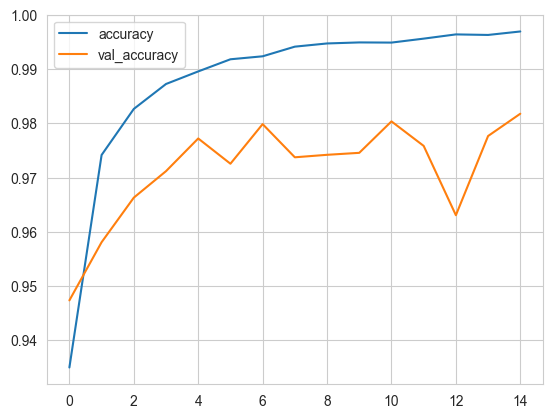

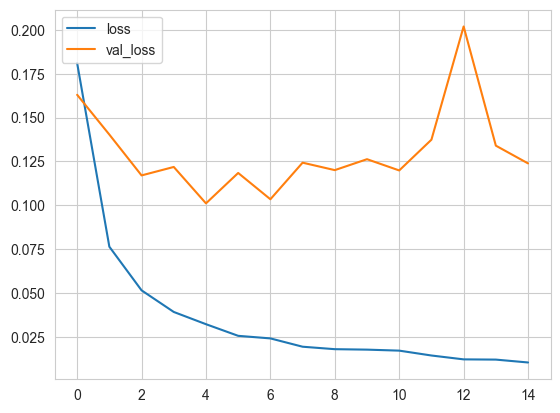

In [97]:
# converting hsitory to dataframe
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [99]:
# Make Prediction
# سنقوم برؤية توقع الشبكة لكل نوع عن طريق ادخال مجموعة عينات التجريب
predict = model.predict(X_test)

685/685 [==============================] - 14s 19ms/step


In [51]:
# Predicted o/p will be in probability distribution 
predict

array([[9.9999994e-01, 7.8602896e-10, 1.3582318e-13, 5.7641630e-10,
        4.5356073e-15],
       [9.9999946e-01, 3.7124039e-07, 2.8087696e-08, 9.8573068e-08,
        5.5653164e-08],
       [9.9999994e-01, 5.6208497e-14, 1.1878005e-16, 1.1524731e-08,
        2.1146558e-18],
       ...,
       [2.8481261e-07, 8.2337151e-16, 2.4637371e-08, 7.6490379e-15,
        9.9999964e-01],
       [3.2169650e-29, 0.0000000e+00, 3.2440412e-28, 0.0000000e+00,
        1.0000000e+00],
       [1.7522642e-31, 0.0000000e+00, 4.4629078e-29, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [100]:
# distributional probability to integers
"""
الأن بعد حصولنا على القيم المتوقعة للعية و احتمالها لكل صنف سنختار القيمة الاكبر و نعتبرها هي التوقع الصحيح لهذه العينة
"""
yhat = np.argmax(predict, axis = 1)

**Checking the confusion matrix and classification report**

In [101]:
"""
سنقوم الأن بانشاء جدول التقييم لرؤية نقاط القوة بالشبكة ونقاط الضعف حيث سنعرض كل توقع قامت به الشبكة بشكل صحيح و كل توقع غير صحيح عن طريق الجدول التالي
"""
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(np.argmax(y_test, axis = 1), yhat)

array([[17882,   130,    50,    35,    21],
       [   59,   485,     5,     5,     2],
       [   26,     6,  1396,    19,     1],
       [    9,     0,    14,   139,     0],
       [   14,     0,     3,     0,  1591]], dtype=int64)

<AxesSubplot: >

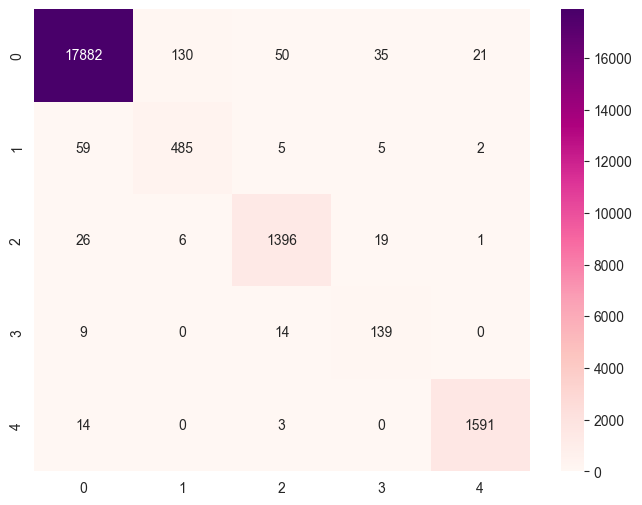

In [103]:
"""
سننشئ خريطة حرارية لتوضيح التوقعات الصحيحة و الخاطئة
"""
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis =1), yhat), annot = True, fmt = '0.0f', cmap= 'RdPu')

In [106]:
"""
سنرى الأن معايير التقييم حسب الجدول السابق
"""
print(classification_report(np.argmax(y_test, axis=1), yhat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.78      0.87      0.82       556
           2       0.95      0.96      0.96      1448
           3       0.70      0.86      0.77       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.88      0.93      0.91     21892
weighted avg       0.98      0.98      0.98     21892

